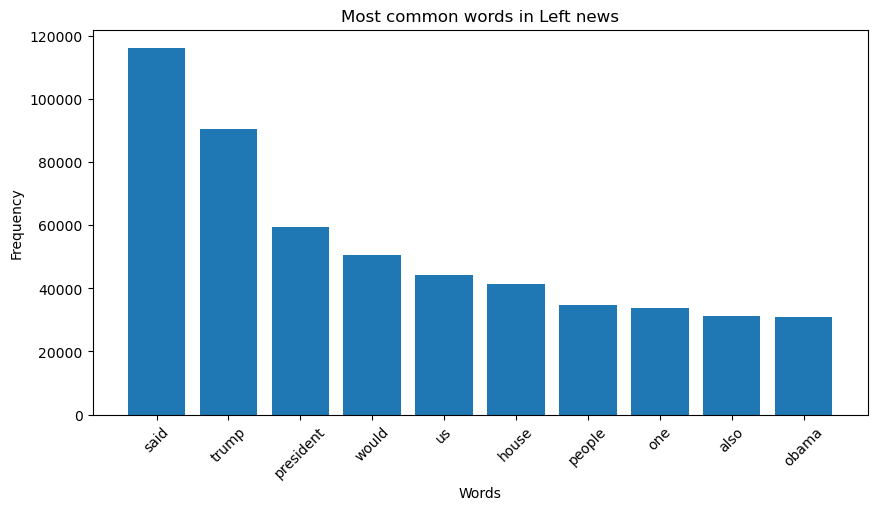

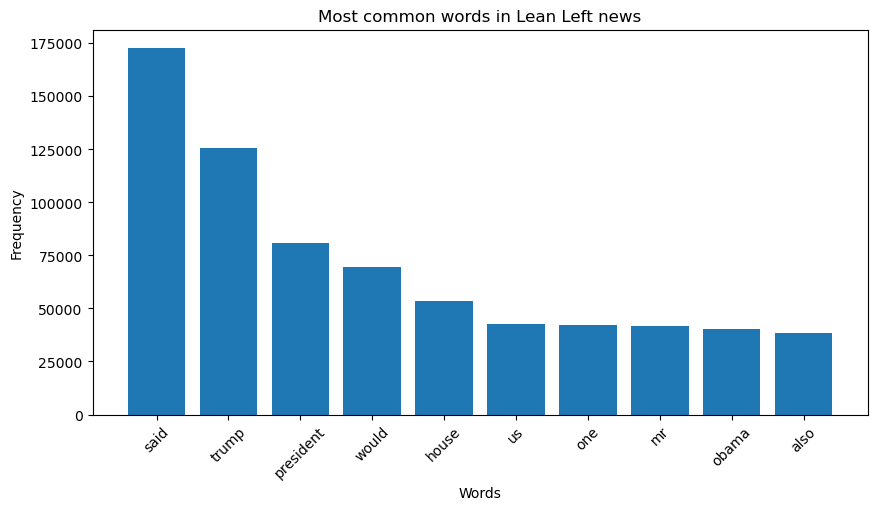

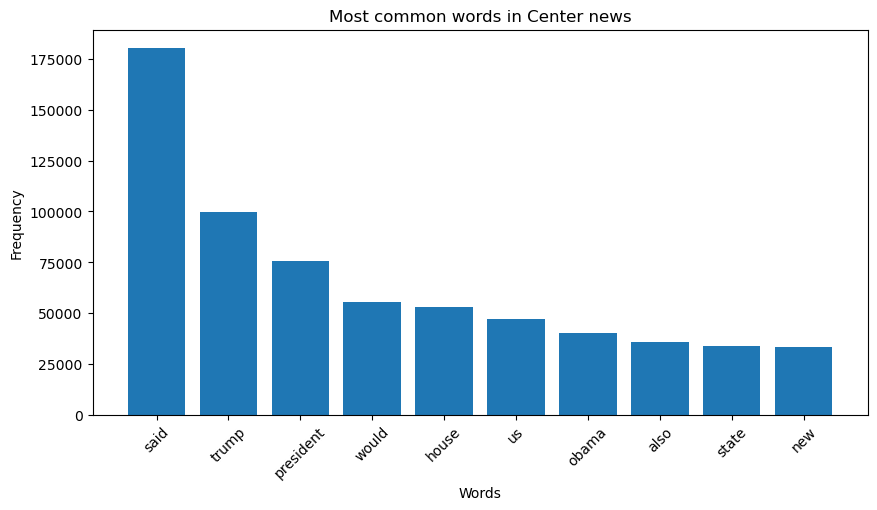

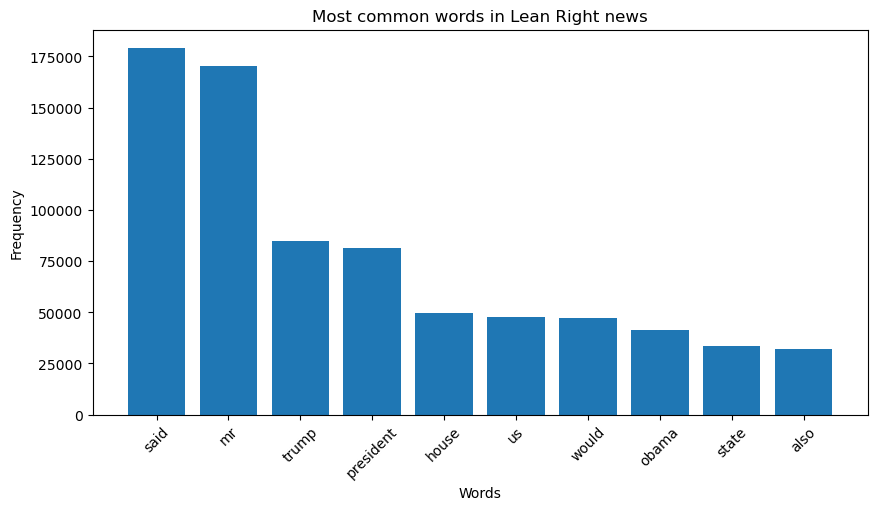

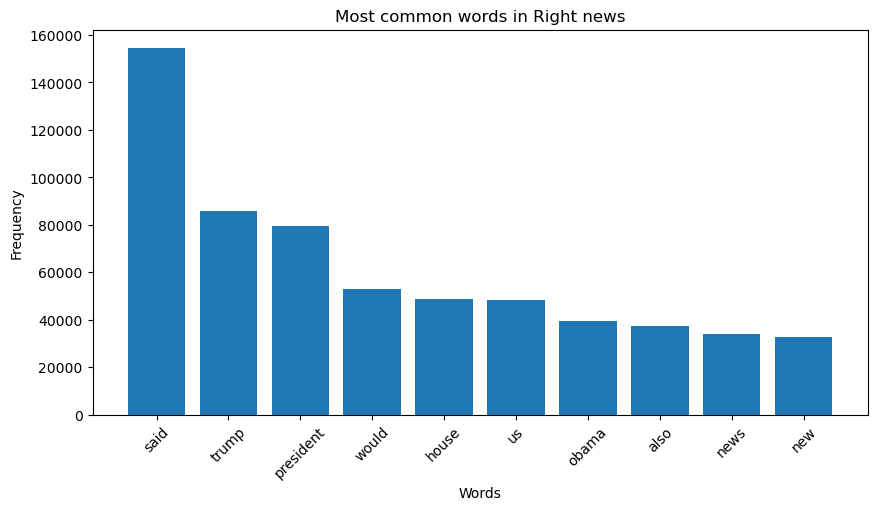

In [4]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import string
import json
import ijson
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

def textClean(text):
    """
    Get rid of the non-letter and non-number characters
    """
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return (text)


def cleanup(text):
    text = textClean(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text


def word_count_by_bias(data):
    # Initialize a dictionary of Counters, one for each bias
    bias_word_counts = defaultdict(Counter)

    # Iterate over each row in the DataFrame
    for index, row in data.iterrows():
        bias = row['bias']
        words = row['text'].split()
        for word in words:
            bias_word_counts[bias][word] += 1
    
    return bias_word_counts

# Load your data (ensure it's properly preprocessed and cleaned)
path = 'C:/Users/gauth/Desktop/courses/CS5604/project/dataset1/combined_data2.csv'
data = pd.read_csv(path)
data['text'] = data['text'].apply(cleanup)  # Assuming 'cleanup' function is used for preprocessing

# Get word counts by bias
bias_word_counts = word_count_by_bias(data)

# Now plot the most common words by bias
def plot_common_words(bias_word_counts, num_words=10):
    for bias, counter in bias_word_counts.items():
        most_common_words = counter.most_common(num_words)
        words = [word for word, freq in most_common_words]
        frequencies = [freq for word, freq in most_common_words]

        plt.figure(figsize=(10, 5))
        plt.bar(words, frequencies)
        plt.title(f'Most common words in {bias} news')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()

plot_common_words(bias_word_counts)